# Perceptrons

**By Kathryn (Kit) Ross, Jayce Holdsambeck, and Aspen Morgan**


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# preprocessing
# from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures

# metrics
from sklearn.metrics import mean_squared_error, accuracy_score, ConfusionMatrixDisplay

# models
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# to ignore convergence warnings
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

## Simple Perceptron Classifier
* Uses the original perceptron: the heaviside step function
*

### Toy Example 1: Make Blobs

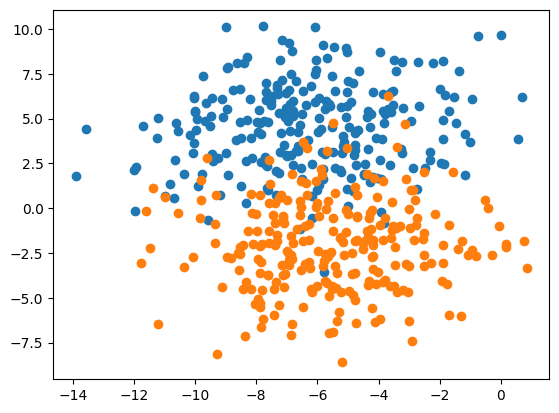

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500,cluster_std=2.5,centers=2)

#plt.scatter(X[:,0],X[:,1])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])


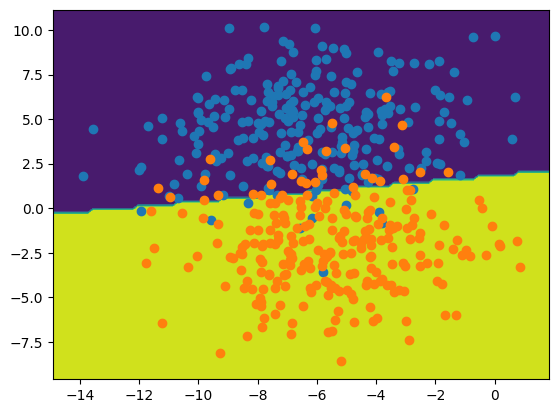

In [ ]:
clf = Perceptron()
clf.fit(X, y)

DecisionBoundaryDisplay.from_estimator(clf, X, response_method='predict')
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

### Toy example 2: Make circles

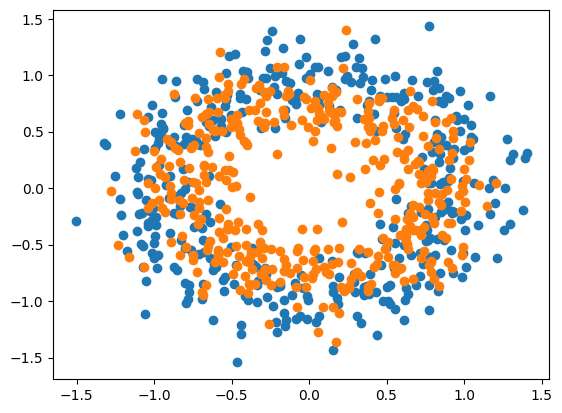

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=800, noise=0.2)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [ ]:
clf = Perceptron()
clf.fit(X, y)

Perceptron()

(-1.5, 1.5)

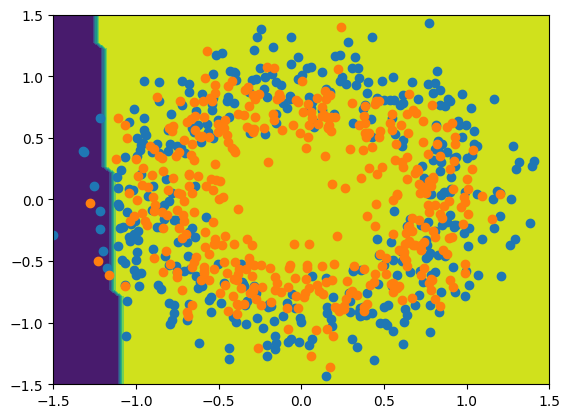

In [ ]:
DecisionBoundaryDisplay.from_estimator(clf, X, response_method='predict')
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

## Multi-layer Perceptron Classification (Binary)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(-1.5, 1.5)

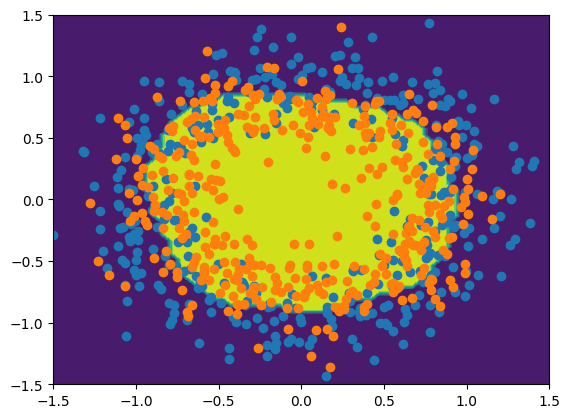

In [ ]:
# classifier
clf = MLPClassifier()
clf.fit(X, y)
DecisionBoundaryDisplay.from_estimator(clf, X, response_method='predict')
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

## Multi Layer Perceptron Classification (Multivariate)

### Iris Dataset
0: Setosa

1: Versicolor

2: Virginica

In [ ]:
from sklearn import datasets
X, y = datasets.load_iris(as_frame=True, return_X_y=True)

In [ ]:
# pipeline
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('clf', MLPClassifier(activation='logistic',
                   solver='sgd'))
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf', MLPClassifier(activation='logistic', solver='sgd'))])

In [ ]:
# grid search
params = {'clf__hidden_layer_sizes': [(3, 3), (3, 3, 3),
                                      3, (10, 10), (10, 10, 10),
                                      10, (20, 20), (20, 20, 20),
                                      20],
          'clf__alpha': np.logspace(-4, 0, 5),
          'clf__learning_rate_init': np.logspace(-4, 0, 5)
}

# get hidden layer sizes options
grid = GridSearchCV(pipe,
                    params,
                    cv=5,
                    scoring='accuracy')

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def fitWithoutWarning():
  grid.fit(X, y)
fitWithoutWarning()

In [ ]:
grid.best_params_

{'clf__alpha': 0.0001,
 'clf__hidden_layer_sizes': 3,
 'clf__learning_rate_init': 1.0}

In [ ]:
best_pipe = grid.best_estimator_

In [ ]:
best_pipe.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=3,
                               learning_rate_init=1.0, solver='sgd'))])

In [ ]:
y_test_pred = best_pipe.predict(X)

In [ ]:
print("Accuracy Score: " + str(accuracy_score(y, y_test_pred)))

Accuracy Score: 0.98


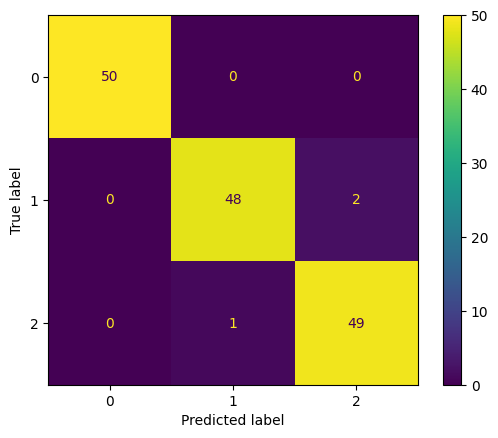

In [ ]:
ConfusionMatrixDisplay.from_predictions(y, y_test_pred)

## Multi-layer Perceptron Regressor

### Select hyperparameters through cross validation
- activation: Type of function to use for each hidden layer node
  - Possible values: **"relu"**, "identity", "logistic", "tanh"
- solver: Process chosen to solve for optimized weight values
  - Possible values: **"adam"**, "lbfgs", "sgd"
- hidden_layer_sizes: Number of hidden layers between input and output
   - Examples: One hidden layer with 2 nodes: (2) | Two hidden layers each with 30 nodes (30, 30)
- alpha: Strength of regularization, which helps with overfitting
- batch_size: Size of subset of data to use for sgd to solve for weights
- learning_rate_init: step size to optimize weigths in sgd

### Fremont Bike Traffic Example

In [ ]:
fremont = pd.read_csv('https://raw.githubusercontent.com/aspenjkmorgan/Perceptrons/main/fremont.csv', parse_dates=True, index_col='Date')
fremont.head(3)

,total,east,west,day_of_week,month,year,covid,holidays,hours_daylight,PRCP,TAVG,SNOW,AWND
Date,,,,,,,,,,,,,
2012-10-03,3521,1760,1761,2,10,2012,0,0,11.863813,0.0,56.0,0.0,16.33
2012-10-04,3475,1708,1767,3,10,2012,0,0,11.804946,0.0,56.5,0.0,14.54
2012-10-05,3148,1558,1590,4,10,2012,0,0,11.746107,0.0,59.5,0.0,12.75


In [ ]:
len(fremont)

3985

Text(0.5, 1.0, 'All Data')

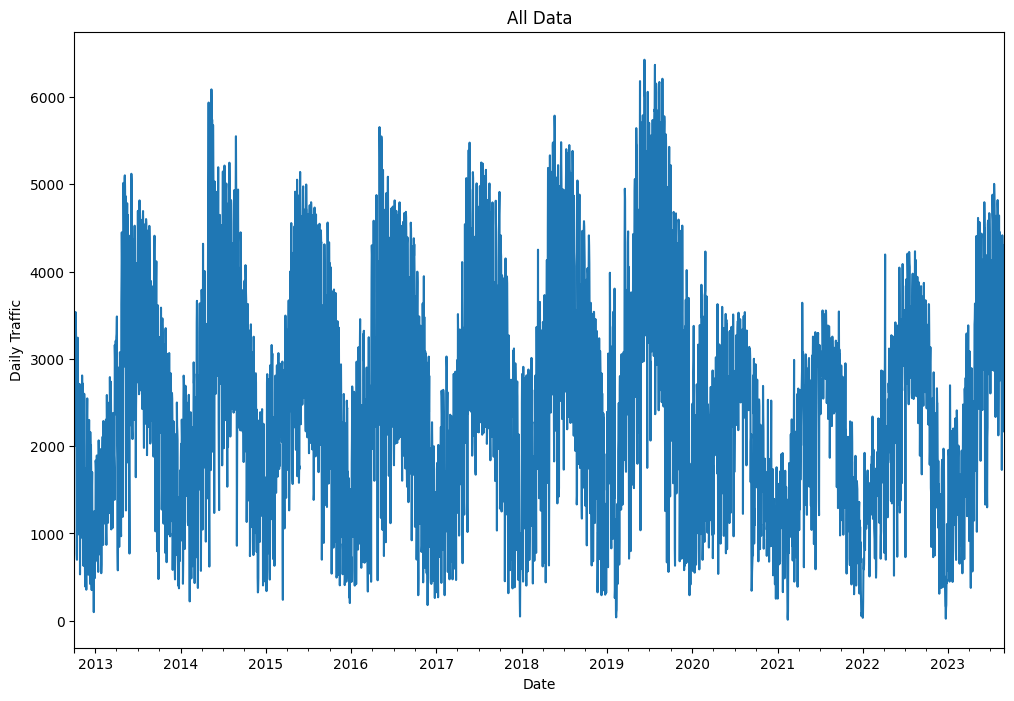

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
fremont['total'].plot()
ax.set_ylabel('Daily Traffic')
ax.set_title('All Data')

In [29]:
X = fremont[['hours_daylight','year','PRCP','TAVG','SNOW','AWND','covid','holidays', 'day_of_week']]
y = fremont['total']

**Let's compare linear regression, random forest and multi-layer perceptron for this dataset!**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Text(0.5, 1.0, 'Testing Data')

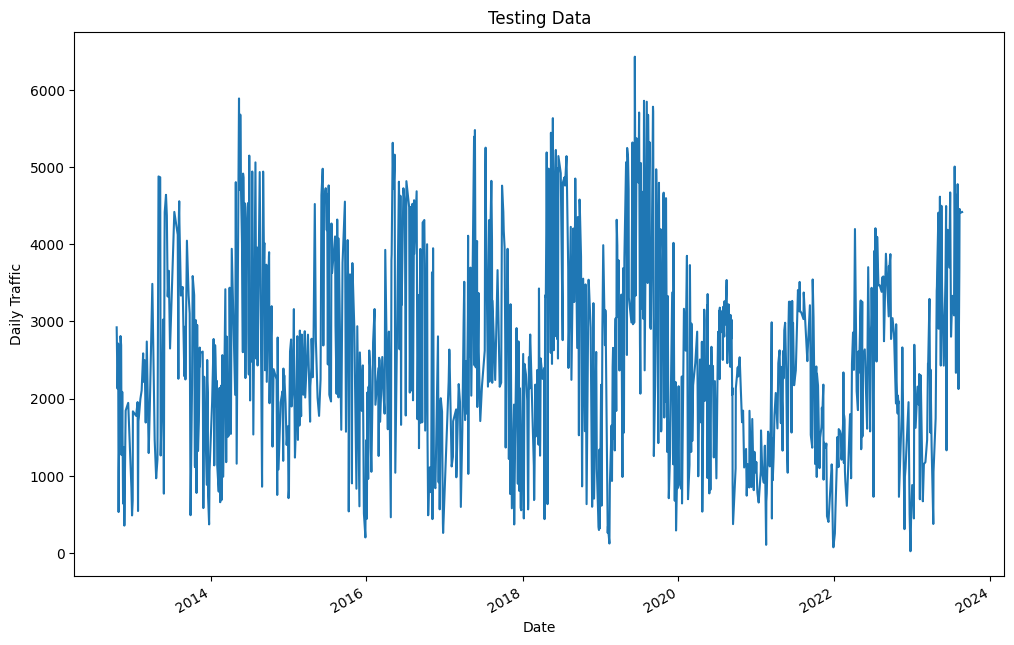

In [54]:
# plot testing data only
fig, ax = plt.subplots(figsize=(12, 8))
y_test.plot()
ax.set_ylabel('Daily Traffic')
ax.set_title('Testing Data')

In [31]:
# linear regression pipeline
num_features = ['hours_daylight','year','PRCP','TAVG','SNOW',
                'AWND','covid','holidays']
cat_features = ['day_of_week']
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
    ])
cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
    ])
feature_processor = ColumnTransformer(transformers=[
    ('num_processor',num_processor,num_features),
    ('cat_processor',cat_processor, cat_features),
])
pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('reg', LinearRegression())
])

# fit and predict
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

# get RMSE
linear_mse = mean_squared_error(y_test, y_test_pred)
print('The root mean squared error of the linear regression model is: ' +
      str(round(np.sqrt(linear_mse), 2)))

The root mean squared error of the linear regression model is: 582.27


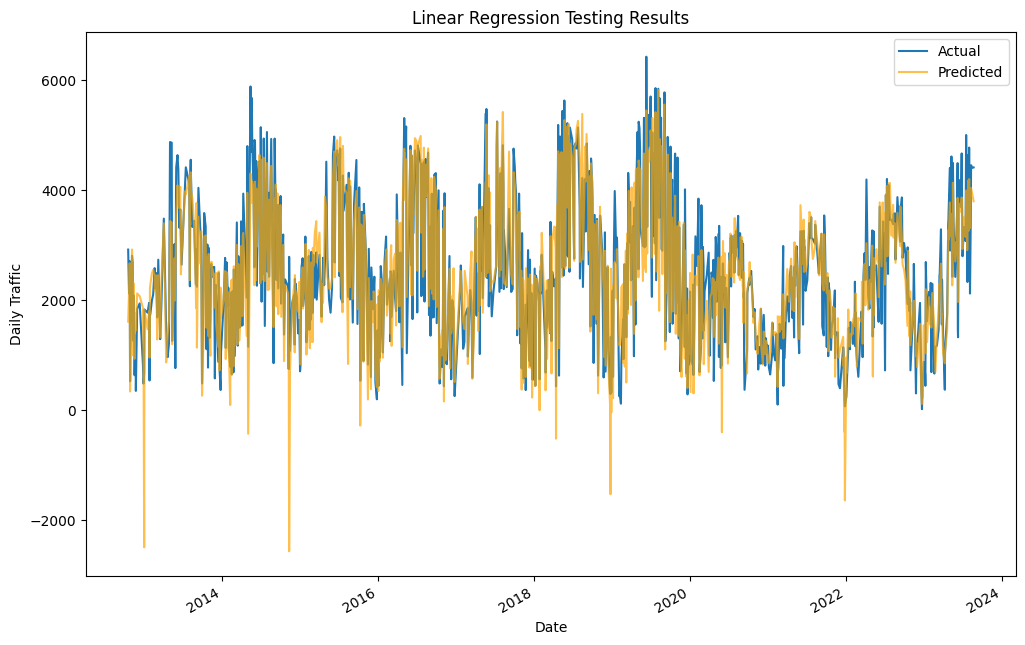

In [82]:
# format results for plotting
results = pd.DataFrame(data=y_test_pred, index=X_test.index, columns=['Predicted'])

# plot results
fig, ax = plt.subplots(figsize=(12, 8))
y_test.plot(ax=ax, label='Actual')
results.plot(ax=ax, c='orange', alpha=0.7)
ax.set_ylabel('Daily Traffic')
ax.set_title('Linear Regression Testing Results')
ax.legend()

In [76]:
results

,0
Date,
2017-06-09,3960.50
2021-08-09,2956.00
2016-01-21,1730.00
2014-05-15,4028.00
2020-06-15,1869.25
...,...
2019-08-10,1811.50
2014-09-10,3952.50
2018-02-01,2174.50


In [83]:
# random forest pipeline
pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('reg', RandomForestRegressor())
])

# grid search of rf hyperparameters
params = {'reg__max_depth': [2, 5, 10],
          'reg__min_samples_split': [2, 4, 8, 16],
          'reg__min_samples_leaf': [1, 2, 4, 8, 16]}

grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)

# best parameters
print(grid.best_params_)

best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test)

# get RMSE
rf_mse = mean_squared_error(y_test, y_test_pred)
print('The root mean squared error of the random forest regression model is: ' +
      str(round(np.sqrt(rf_mse), 2)))

{'reg__max_depth': 10, 'reg__min_samples_leaf': 1, 'reg__min_samples_split': 4}
The root mean squared error of the random forest regression model is: 472.98


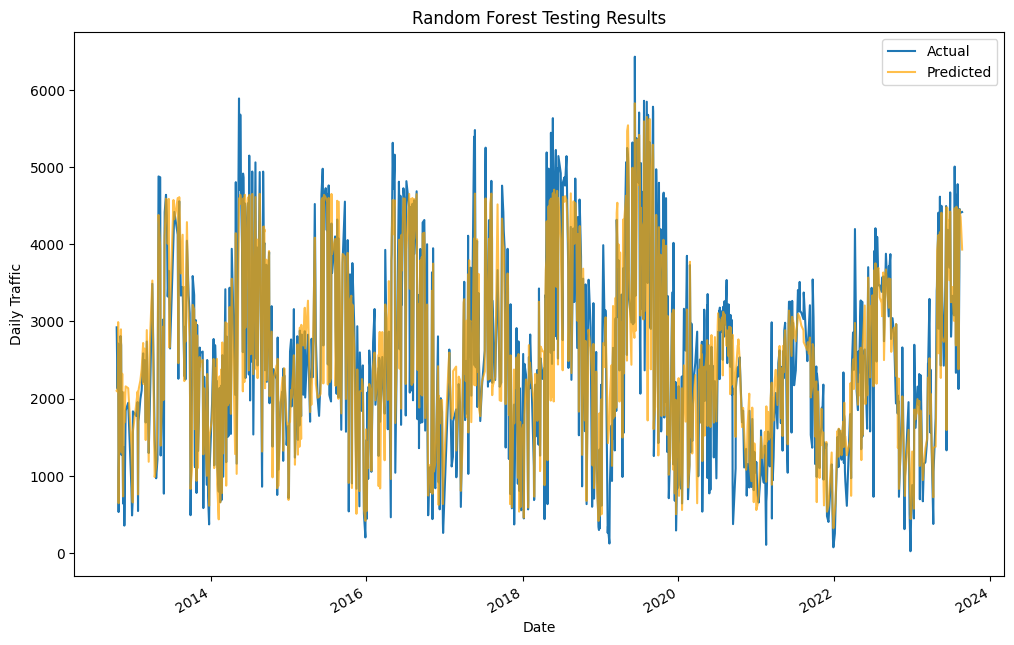

In [84]:
# format results for plotting
results = pd.DataFrame(data=y_test_pred, index=X_test.index, columns=['Predicted'])

# plot results
fig, ax = plt.subplots(figsize=(12, 8))
y_test.plot(ax=ax, label='Actual')
results.plot(ax=ax, c='orange', alpha=0.7)
ax.set_ylabel('Daily Traffic')
ax.set_title('Random Forest Testing Results')
ax.legend()

In [ ]:
# multi-layer perceptron pipeline
num_features = ['hours_daylight','year','PRCP','TAVG','SNOW','AWND','covid','holidays']
cat_features = ['day_of_week']
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
    ])
cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
    ])
feature_processor = ColumnTransformer(transformers=[
    ('num_processor', num_processor, num_features),
    ('cat_processor', cat_processor, cat_features),
  ])

pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('reg', MLPRegressor(activation='relu',
                   solver='adam'))
])

# grid search
params = {'reg__hidden_layer_sizes': [100, (100, 100), (100, 100, 100),
                                      200, (200, 200), (200, 200, 200)],
          'reg__learning_rate_init': np.logspace(-4, 0, 5), # only for either sgd or adam
          'reg__alpha': np.logspace(-5, -1, 5)
}

# get hidden layer sizes options
grid = RandomizedSearchCV(pipe,
                    params,
                    cv=5,
                    scoring='neg_mean_squared_error')

# fit
@ignore_warnings(category=ConvergenceWarning)
def fitWithoutWarning():
  grid.fit(X_train, y_train)
fitWithoutWarning()

# best parameters
print(grid.best_params_)

# predict
best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test)

# get RMSE
mlr_mse = mean_squared_error(y_test, y_test_pred)
print('The root mean squared error of the multi-layer perceptron regression model is: ' +
      str(round(np.sqrt(mlr_mse), 2)))

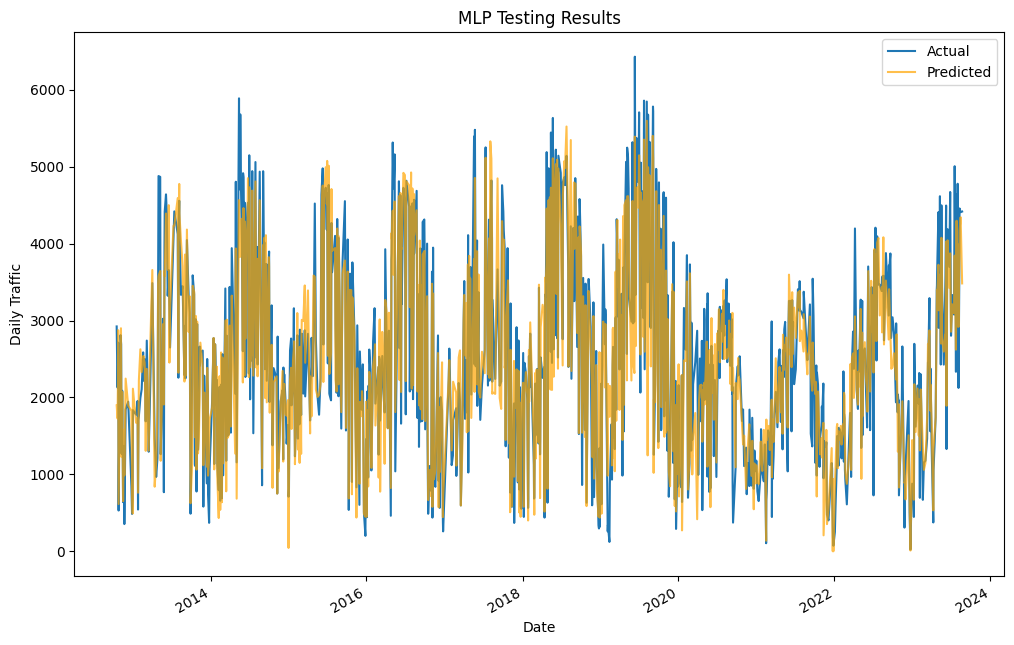

In [86]:
# format results for plotting
results = pd.DataFrame(data=y_test_pred, index=X_test.index, columns=['Predicted'])

# plot results
fig, ax = plt.subplots(figsize=(12, 8))
y_test.plot(ax=ax, label='Actual')
results.plot(ax=ax, c='orange', alpha=0.7)
ax.set_ylabel('Daily Traffic')
ax.set_title('MLP Testing Results')
ax.legend()